In [ ]:
#### Q1: #Emmanuel
#this current code plots a linear regression for particulate microcystin (PM) and dissolved microcystin (DM) with search term 'toledo water (TW)'.
#To generate plot for search term 'Blue Green Algae (BGA)', replace all TW in the plot section with BGA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("OhioFinalData_1.csv")

# Normalize the values of PM, DM, and GT columns to range from 0 to 100
scaler = MinMaxScaler(feature_range=(0, 100))
df[['PM', 'DM', 'BGA', 'TW']] = scaler.fit_transform(df[['PM', 'DM', 'BGA', 'TW']])

# Plot regression between PM and GT
plt.figure(figsize=(6, 4))
plt.scatter(df['PM'], df['TW'], color='blue', label='PM vs TW')
plt.xlabel('PM (Normalized)')
plt.ylabel('TW (Normalized)')
plt.title('Paticulate Microcystin vs "Toledo Water" Search Term')
#plt.grid(True)

# Fit linear regression model
reg_pm_gt = LinearRegression().fit(df[['PM']], df['TW'])
plt.plot(df['PM'], reg_pm_gt.predict(df[['PM']]), color='red')

plt.show()

# Slope and intercept for PM vs GT
slope_pm_gt = reg_pm_gt.coef_[0]
intercept_pm_gt = reg_pm_gt.intercept_
print("Slope for PM vs TW:", slope_pm_gt)
print("Intercept for PM vs TW:", intercept_pm_gt)


# Plot regression between DM and GT
plt.figure(figsize=(6, 4))
plt.scatter(df['DM'], df['TW'], color='green', label='DM vs TW')
plt.xlabel('DM (Normalized)')
plt.ylabel('TW (Normalized)')
plt.title('Dissolved Microcystin vs "Toledo Water" Search Term ')
#plt.grid(True)

# Fit linear regression model
reg_dm_gt = LinearRegression().fit(df[['DM']], df['TW'])
plt.plot(df['DM'], reg_dm_gt.predict(df[['DM']]), color='orange')

plt.show()

# Slope and intercept for DM vs GT
slope_dm_gt = reg_dm_gt.coef_[0]
intercept_dm_gt = reg_dm_gt.intercept_
print("Slope for DM vs TW:", slope_dm_gt)
print("Intercept for DM vs TW:", intercept_dm_gt)


coefficient of determination: 0.009231041195351342
intercept: [8.18173191]
slope: [[0.0296209]]


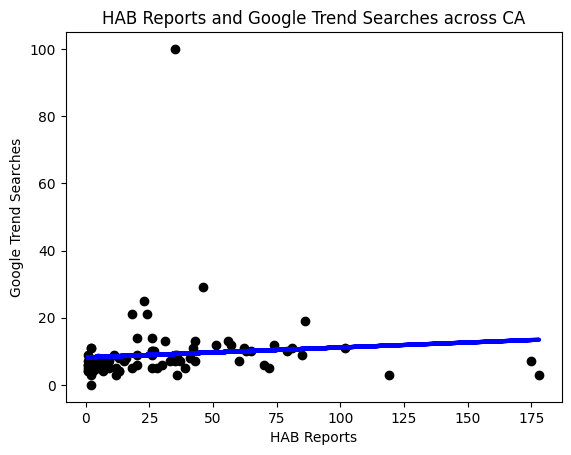

coefficient of determination: 0.0010880805650265168
intercept: [9.2142872]
slope: [[0.08401908]]


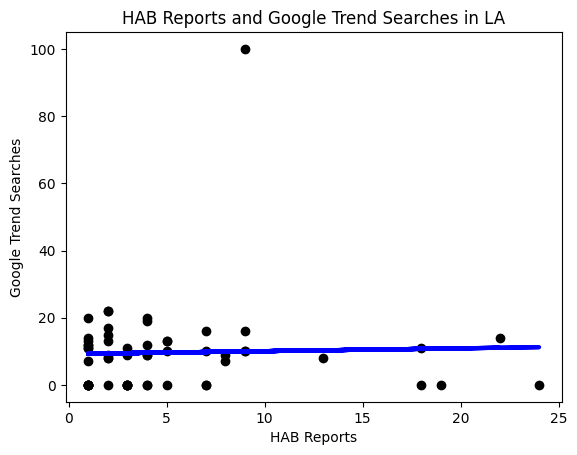

coefficient of determination: 0.00571224104543222
intercept: [13.02267838]
slope: [[-0.28476455]]


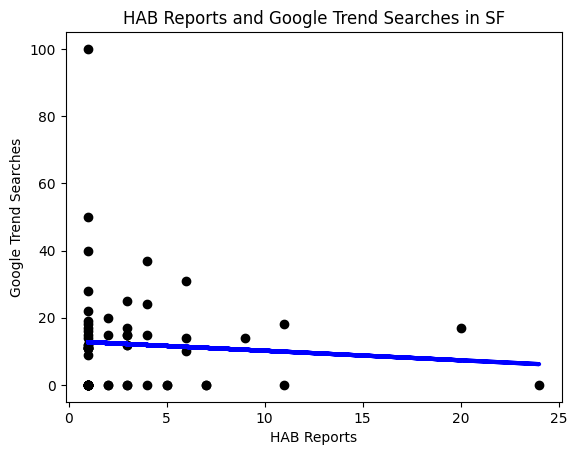

coefficient of determination: 0.0010804119667330303
intercept: [2.73396832]
slope: [[0.02685424]]


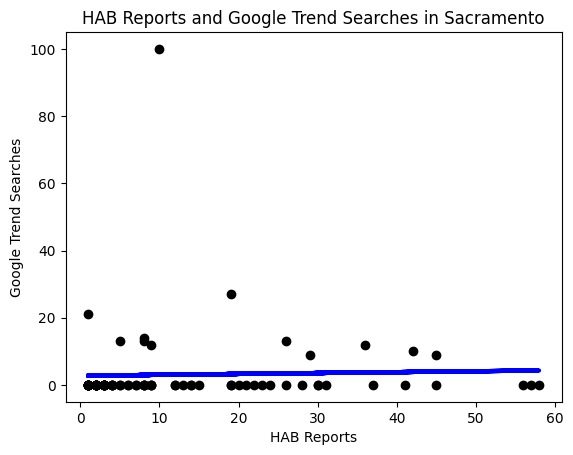

In [ ]:
#### Q2: # Maddy

#take out testing and training, try on all metros

# Question: How does public awareness of cyanobacteria in metropolitan
# areas of California (i.e. San Francisco Bay Area, Los Angeles Area, and Sacramento/Central Valley)
# relate to the number of harmful algal bloom (HAB) reports in the area?

# explanatory variable/independent/x: total number of monthly HAB reports in a metro area
# response variable/dependent/y: monthly search data in a metro area

# one regression per metro

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Read in csv
caData = pd.read_csv("CAFinalData_WholeState.csv")
caDataMetro = pd.read_csv("CAFinalData_Metros.csv")

#seperate metros
caDataSF = caDataMetro[caDataMetro.Google_Metro == "SF"]
caDataSac = caDataMetro[caDataMetro.Google_Metro == "Sac"]
caDataLA = caDataMetro[caDataMetro.Google_Metro == "LA"]

# Whole State
#separate x and y
caData_X = caData[["Total_Num_Reports"]]
caData_y = caData[["blue green algae"]]

# Create linear regression object
regr = linear_model.LinearRegression()

#fit the model
regr.fit(caData_X, caData_y)

#calculate coeff of determination
r_sq = regr.score(caData_X, caData_y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

caData_y_pred = regr.predict(caData_X)
#print(f"predicted response:\n{caData_y_pred}")

plt.xlabel("HAB Reports")
plt.ylabel("Google Trend Searches")

plt.title("HAB Reports and Google Trend Searches across CA")

# Plot outputs
plt.scatter(caData_X, caData_y, color="black")
plt.plot(caData_X, caData_y_pred, color="blue", linewidth=3)


plt.show()

# LA Regression
#separate x and y
caDataLA_X = caDataLA[["Total_Num_Reports"]]
caDataLA_y = caDataLA[["blue green algae"]]

# Create linear regression object
regr = linear_model.LinearRegression()

#fit the model
regr.fit(caDataLA_X, caDataLA_y)

#calculate coeff of determination
r_sq = regr.score(caDataLA_X, caDataLA_y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

caDataLA_y_pred = regr.predict(caDataLA_X)

plt.xlabel("HAB Reports")
plt.ylabel("Google Trend Searches")

plt.title("HAB Reports and Google Trend Searches in LA")

# Plot outputs
plt.scatter(caDataLA_X, caDataLA_y, color="black")
plt.plot(caDataLA_X, caDataLA_y_pred, color="blue", linewidth=3)

plt.show()


# SF Regression
#separate x and y
caDataSF_X = caDataSF[["Total_Num_Reports"]]
caDataSF_y = caDataSF[["blue green algae"]]

# Create linear regression object
regr = linear_model.LinearRegression()

#fit the model
regr.fit(caDataSF_X, caDataSF_y)

#calculate coeff of determination
r_sq = regr.score(caDataSF_X, caDataSF_y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

caDataSF_y_pred = regr.predict(caDataSF_X)
plt.xlabel("HAB Reports")
plt.ylabel("Google Trend Searches")

plt.title("HAB Reports and Google Trend Searches in SF")

# Plot outputs
plt.scatter(caDataSF_X, caDataSF_y, color="black")
plt.plot(caDataSF_X, caDataSF_y_pred, color="blue", linewidth=3)

plt.show()

# SAC Regression
#separate x and y
caDataSac_X = caDataSac[["Total_Num_Reports"]]
caDataSac_y = caDataSac[["blue green algae"]]

# Create linear regression object
regr = linear_model.LinearRegression()

#fit the model
regr.fit(caDataSac_X, caDataSac_y)

#calculate coeff of determination
r_sq = regr.score(caDataSac_X, caDataSac_y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

caDataSac_y_pred = regr.predict(caDataSac_X)

plt.xlabel("HAB Reports")
plt.ylabel("Google Trend Searches")

plt.title("HAB Reports and Google Trend Searches in Sacramento")

# Plot outputs
plt.scatter(caDataSac_X, caDataSac_y, color="black")
plt.plot(caDataSac_X, caDataSac_y_pred, color="blue", linewidth=3)

plt.show()



In [ ]:
#### Q3: # Jordan
## Question: How does the advisory level of a HAB report and the type of waterbody a HAB occurs
## modify the relationship in Q2?

#### (1) import packages & read in data ####

# importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS

# reading in data
caData = pd.read_csv("CAFinalData_WholeState.csv")
caData_metros = pd.read_csv("CAFinalData_Metros.csv")

# renaming blue green algae column to make things simpler
caData.rename(columns = {'blue green algae': 'blue_green_algae'}, inplace=True)
caData_metros.rename(columns = {'blue green algae': 'blue_green_algae'}, inplace=True)

# create a df for each metro
sf = caData_metros[caData_metros.Google_Metro == "SF"]
sac = caData_metros[caData_metros.Google_Metro == "Sac"]
la = caData_metros[caData_metros.Google_Metro == "LA"]

#### (2) whole state analyses ####

## getting initial relationship
#plt.scatter(x = caData.Total_Num_Reports, y = caData.blue_green_algae)
x = caData.Total_Num_Reports.to_numpy().reshape((-1, 1))
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.009
#print(model.coef_[0]) # our slope is 0.0296

## looking at correlation matrix to see if any other variables have strong correlation to google trend results
# seems like > 0.05 (positive)
#print(caData.corr())
# num_reports_lake, num_reports_river, num_reports caution, percent_river, percent_caution, num_danger
# need to make sure correlation with total_num_reports <0.7
# num_reports_caution, percent_lake, percent_river, percent caution, num_danger can all be used

# trying percent caution
x = caData.filter(["Total_Num_Reports", "Percent_Caution"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0247 [best improved explanation of var. of data]
#print(model.coef_) # our slope is [0.03019794 5.35294144] [percent_caution has strong effect size]

# trying num reports danger
x = caData.filter(["Total_Num_Reports", "Num_Reports_Danger"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0102 [slightly improved explanation of var. of data]
#print(model.coef_) # our slope is [0.02521985 0.16950785] [num_reports_danger has smaller effect size]

# trying percent river
x = caData.filter(["Total_Num_Reports", "Percent_River"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0135 [improved explanation of var. of data]
#print(model.coef_) # our slope is [0.02356363 3.38071286] [percent river has high effect size]

# trying percent lake
x = caData.filter(["Total_Num_Reports", "Percent_Lake"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0109 [improved explanation of var. of data]
#print(model.coef_) # our slope is [ 0.02648243 -1.69113227] [percent_lake has negative effect size]

# combining percent caution and percent river
x = caData.filter(["Total_Num_Reports", "Percent_River", "Percent_Caution"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0289 [improved explanation of var. of data from 1 var]
#print(model.coef_) # our slope is [0.02415938 3.36999004 5.34826352] [good!]

# combining percent caution and percent lake and percent river
x = caData.filter(["Total_Num_Reports", "Percent_Lake", "Percent_Caution", "Percent_River"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0295 [slightly improved explanation of var. of data from 2 var]
#print(model.coef_) # our slope is [0.02437606 1.50875385 5.40740922 4.81536778] [weirdly percent_lake has an increased effect size here]

# combining percent caution and percent lake and num reports danger
x = caData.filter(["Total_Num_Reports", "Percent_Lake", "Percent_Caution", "Num_Reports_Danger"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0266 [slightly improved explanation of var. of data from 2 var]
#print(model.coef_) # our slope is [ 0.02350475 -1.65153667  5.17803021  0.13901491] [percent_lake negative again]

# combining percent caution, percent river, and number_of reports danger (FINAL??)
x = caData.filter(["Total_Num_Reports", "Percent_Caution", "Percent_River", "Num_Reports_Danger"]).to_numpy()
y = caData.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0302 [slightly improved explanation of var. of data from 2 var]
print(model.coef_) # our slope is [0.01967585 5.22544137 3.57884871 0.15776135]

## summary
# percent_caution, percent_river, and number_of_reports_danger are best variables
# w/ percent caution as highest effect size (5.22), percent river medium effect size (3.57), and
# num_reports_danger (0.1577)

[0.01967585 5.22544137 3.57884871 0.15776135]


In [ ]:
#### (3) sacramento analyses ####

## getting initial relationship
#plt.scatter(x = sac.Total_Num_Reports, y = sac.blue_green_algae) # lots of zeros here but let's try anyways
x = sac.Total_Num_Reports.to_numpy().reshape((-1, 1))
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001
#print(model.coef_[0]) # our slope is 0.0269

## looking at correlation matrix to see if any other variables have strong correlation to google trend results
# seems like > 0.03 (positive ideally)
#print(sac.drop("Google_Metro", axis = 1).corr())
# num_reports_river, num_reports caution, num_reports_danger percent_river, percent caution
# need to make sure correlation with total_num_reports <0.7:
# num_reports_river, num_reports_caution, num_reports_danger,
# percent_river, percent_caution

# trying single variable num_reports_river
x = sac.filter(["Total_Num_Reports", "Num_Reports_Rivers"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.004 [very low]
#print(model.coef_) # our slope is [-0.0104473   0.15308246] [makes num of reports have negative relationship]

# trying single variable num_reports_caution
x = sac.filter(["Total_Num_Reports", "Num_Reports_Caution"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0027 [better]]
#print(model.coef_) # our slope is [0.00283062 0.11708887] [positive relationship]

# trying single variable num_reports_danger
x = sac.filter(["Total_Num_Reports", "Num_Reports_Danger"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001887 [better]
#print(model.coef_) # our slope is [0.0160998  0.39895804] [more positive relationship than caution]

# trying single variable percent_lake
x = sac.filter(["Total_Num_Reports", "Percent_Lake"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.009 [better]
#print(model.coef_) # our slope is [ 0.02138726 -3.52756807] [negative relationship!]

# trying single variable percent_river
x = sac.filter(["Total_Num_Reports", "Percent_River"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.019 [better]
#print(model.coef_) # our slope is [0.0204571  6.31539796] [percent river has strong positive relationship]

# trying single variable percent_marine
x = sac.filter(["Total_Num_Reports", "Percent_Marine"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.003 [much lower]
#print(model.coef_) # our slope is [ 0.02681574 -3.54269589] [negative relationship]

# trying single variable percent_caution
x = sac.filter(["Total_Num_Reports", "Percent_Caution"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.38 [much higher]
#print(model.coef_) # our slope is [0.0210466  8.48719195] [positive relationship]

# combining our two best:
x = sac.filter(["Total_Num_Reports", "Percent_Lake", "Percent_Marine"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.015 [worse]
#print(model.coef_) # our slope is [ 0.01989456 -4.44638937 -6.32441597] [both of these still negative!]

# combining our positive variables
x = sac.filter(["Total_Num_Reports", "Percent_River", "Percent_Caution", "Num_Reports_Danger"]).to_numpy()
y = sac.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
print(model.score(x, y)) # our r-squared is 0.0534 [worse]
print(model.coef_) # our slope is [5.91359792e-03 5.81255301e+00 7.88092033e+00 3.58360352e-01] [similar results to prior!]

0.053405768930118724
[5.91359792e-03 5.81255301e+00 7.88092033e+00 3.58360352e-01]


In [ ]:
#### (3) sf analyses ####

## getting initial relationship
#plt.scatter(x = sf.Total_Num_Reports, y = sf.blue_green_algae) # lots of zeros here but let's try anyways
x = sf.Total_Num_Reports.to_numpy().reshape((-1, 1))
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.005
#print(model.coef_[0]) # our slope is -0.284

## looking at correlation matrix to see if any other variables have strong correlation to google trend results
# seems like > 0.01 positive ideally
#print(sf.drop("Google_Metro", axis = 1).corr())
# percent_other, percent marine
# need to make sure correlation with total_num_reports <0.7:
# those two are below <0.7

# trying single variable num_reports_river
x = sf.filter(["Total_Num_Reports", "Num_Reports_Rivers"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.007 [low]
#print(model.coef_) # our slope is [-0.36907021  0.74703248] [makes num of reports have negative relationship]

# trying single variable percent_rivers
x = sf.filter(["Total_Num_Reports", "Num_Reports_Rivers"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.007 [low]
#print(model.coef_) # our slope is [-0.36907021  0.74703248] [still makes num of reports have negative relationship]

# trying single variable percent_marine
x = sf.filter(["Total_Num_Reports", "Percent_Marine"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.006 [low]
#print(model.coef_) # our slope is [-0.29848824  1.88090825] [also makes num_reports have negative relationship]

# trying single variable percent_other
x = sf.filter(["Total_Num_Reports", "Percent_Other"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.117 [high]
#print(model.coef_) # our slope is [-0.09205598 16.33142242] [still makes num of reports have negative relationship]
# relationship likely due to carinquez strait fish kill event -- "strait" falling into other
# our model does not account for importance of a significant single report!
# notes on report "larger than a football field" lol

# trying other things that were relevant for past two
x = sf.filter(["Total_Num_Reports", "Percent_Lake"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.083 [med]
#print(model.coef_) # our slope is [ -0.30025229 -11.47412929] [very negative relationship!]

# trying other things that were relevant for past two
x = sf.filter(["Total_Num_Reports", "Percent_Caution"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.018 [med]
#print(model.coef_) # our slope is [-0.21935825  5.14285131] [positive relationship! but makes number of reports negative]

# trying other things that were relevant for past two
x = sf.filter(["Total_Num_Reports", "Num_Reports_Danger"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.016 [med]
#print(model.coef_) # our slope is [-0.10394687 -2.37317885 [negative relationship!]

# trying other things that were relevant for past two
x = sf.filter(["Total_Num_Reports", "Percent_Marine", "Percent_Other"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.118 [high]
#print(model.coef_) # our slope is [-0.1089034   2.3467225  16.35472763] [cool!]

# trying other things that were relevant for past two
x = sf.filter(["Total_Num_Reports", "Percent_Marine", "Percent_Other", "Percent_Caution"]).to_numpy()
y = sf.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.121 [high
print(model.coef_) # our slope is [-0.08562143  2.92635998 15.82183797  2.65760767]

## see notes above about the strait report for august 2019.
# here, number of reports is not a good predictor
# other is important- due to the term "strait" likely due to 2019 fish kill

[-0.08562143  2.92635998 15.82183797  2.65760767]


In [ ]:
#### (4) la analysis ####

## getting initial relationship
#plt.scatter(x = la.Total_Num_Reports, y = la.blue_green_algae) # lots of zeros here but let's try anyways
x = la.Total_Num_Reports.to_numpy().reshape((-1, 1))
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001
#print(model.coef_[0]) # our slope is 0.08401

## looking at correlation matrix to see if any other variables have strong correlation to google trend results
# seems like > 0.01 positive ideally
#print(la.drop("Google_Metro", axis = 1).corr())
# not much here- num_reports_rivers, percent_rivers, and percent_danger
# need to make sure correlation with total_num_reports <0.7:
# all are below 0.7

# trying other things that were relevant for past two
x = la.filter(["Total_Num_Reports", "Percent_Lake"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.0057 [low]
#print(model.coef_) # our slope is [ 0.06521817 -4.00715623] [negative relationship!]

# trying percent_river
x = la.filter(["Total_Num_Reports", "Percent_River"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.018 [higher]
#print(model.coef_) # our slope is [ 0.07021877 10.64438031] [strong positive relationship!]

# trying percent_danger
x = la.filter(["Total_Num_Reports", "Percent_Danger"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001 [low]
#print(model.coef_) # our slope is [0.08398561 0.14614445] [small relationship!]

# trying percent_caution
x = la.filter(["Total_Num_Reports", "Percent_Caution"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001 [low]
#print(model.coef_) # our slope is [ 0.09176167 -1.97602255] [negative relationship!]

# random test
x = la.filter(["Total_Num_Reports", "Percent_NoAdvisory"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
#print(model.score(x, y)) # our r-squared is 0.001 [low]
#print(model.coef_) # our slope is [  0.09534505 -31.6930462 ] [negative relationship!] <- this may be a good thing to point out

# trying percent_danger, percent_rivers
x = la.filter(["Total_Num_Reports", "Percent_Danger", "Percent_River"]).to_numpy()
y = la.blue_green_algae.to_numpy()
model = linear_model.LinearRegression().fit(x,y)
print(model.score(x, y)) # our r-squared is 0.019 [high]
print(model.coef_) # our slope is  [0.06943755  1.77854634 10.93273181] [positive relationships!]


0.01901092410384342
[ 0.06943755  1.77854634 10.93273181]
